#             Attrition au sein des entreprises
###                Pourquoi les employés démissionnent ?

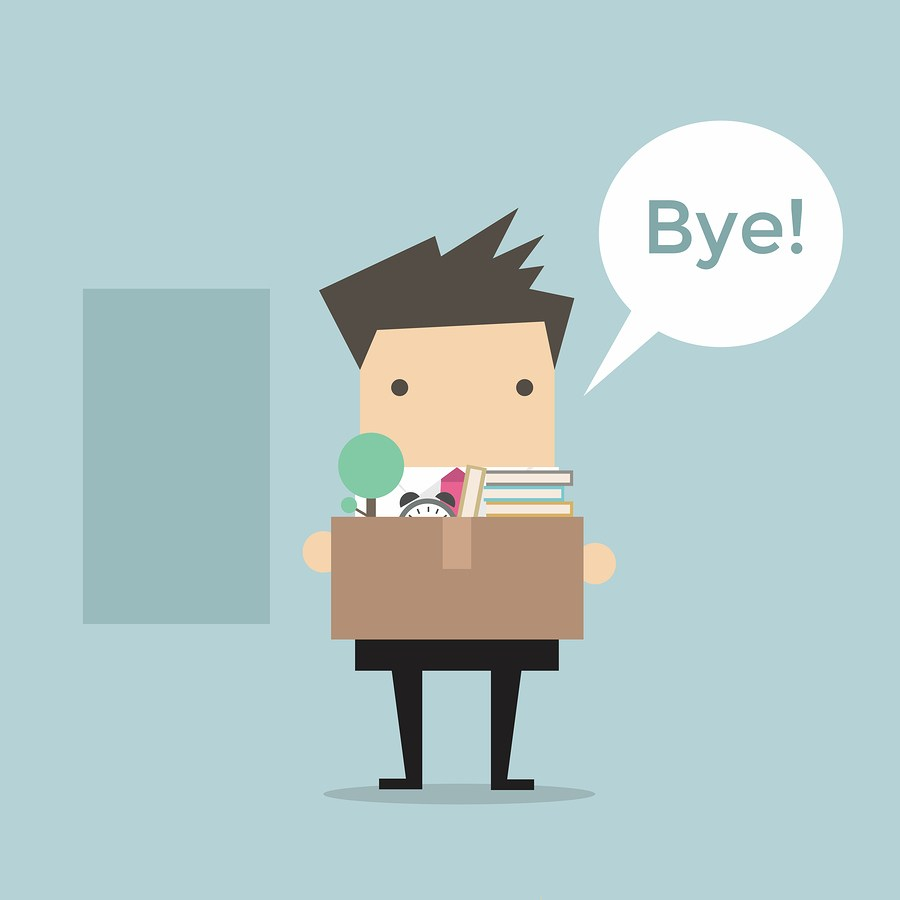

In [94]:
from IPython.display import Image
Image('/content/Attrition.jpg')

## APERÇU sur NOTRE ANALYSE

Dans ce projet, nous essayons d'analyser quels facteurs conduisent à la rétention des employés dans les entreprises et quels facteurs les influencent le plus. Nous utilisons un ensemble de données publié par le service des ressources humaines d'IBM.
* Commentaire important - comme il s’avère cela s’agit d’une base de donnée fictive.

## Préparation des données: chargement et nettoyage

In [95]:
# Paramétrage, charger des differentes librairies que nous pouvons utilisé
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import os
import seaborn as sns
import sys

%matplotlib inline
from matplotlib.ticker import NullFormatter 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score  
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score,confusion_matrix,classification_report

In [96]:
#nous modifions le nombre de lignes 
#à afficher dans les print pour éviter que le tutoriel
#se résume à de multples affichages de longs tableaux
pd.options.display.max_rows = 10

In [97]:
#importer la base
attrition = pd.read_csv('/content/attrition.csv')
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [98]:
#vérifions le type de la base
print(type(attrition))

<class 'pandas.core.frame.DataFrame'>


Le type DataFrame est bien reconnu.Voyons maintenant l'architecture de la structure de notre base.

In [99]:
#dimensions : nombre de lignes, nombre de colonnes
#la ligne d'en-tête n'est pas comptabilisée
#dans le nombre de lignes
print(attrition.shape)

(1470, 35)


In [100]:
#Nom des colonnes 
Nom = attrition.columns.values 
print(Nom)

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']


In [101]:
#type de chaque colonne
print(attrition.dtypes)

Age                         int64
Attrition                  object
BusinessTravel             object
DailyRate                   int64
Department                 object
                            ...  
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
Length: 35, dtype: object


In [102]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


En tout, nous avons 34 variables comprenant à la fois les caractéristiques catégorielles et numériques. La variable cible est "attrition" de l'employé qui peut être un YES ou un NO.

In [103]:
# Pour chaque colonne, le nombre valeur manquantes
nb_null=attrition.isnull().sum()
nb_null

Age                        0
Attrition                  0
BusinessTravel             0
DailyRate                  0
Department                 0
                          ..
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Length: 35, dtype: int64

nous n’avons aucune variable nulle ni manquante.Notre base de données est donc prête à être utilisé.


In [104]:
#supprimer certains chapms :
attrition=attrition.drop([ 'EmployeeNumber','JobInvolvement','MaritalStatus',
                          'NumCompaniesWorked',
                          ], axis=1)
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,2,Sales Executive,4,5993,19479,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,Research Scientist,2,5130,24907,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,1,Laboratory Technician,3,2090,2396,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,1,Research Scientist,3,2909,23159,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,1,Laboratory Technician,2,3468,16632,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,2,Laboratory Technician,4,2571,12290,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,3,Healthcare Representative,1,9991,21457,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,2,Manufacturing Director,2,6142,5174,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,63,2,Sales Executive,2,5390,13243,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [105]:
attrition.info()  # non-null ou Nan 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

## Statistiques descriptives

### 1) statistique univarié

#### variables quantitatives
Analysons d'abord les différentes variables numériques. Pour ce faire, nous pouvons réellement tracer une boîte à moustaches montrant toutes les caractéristiques numériques

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


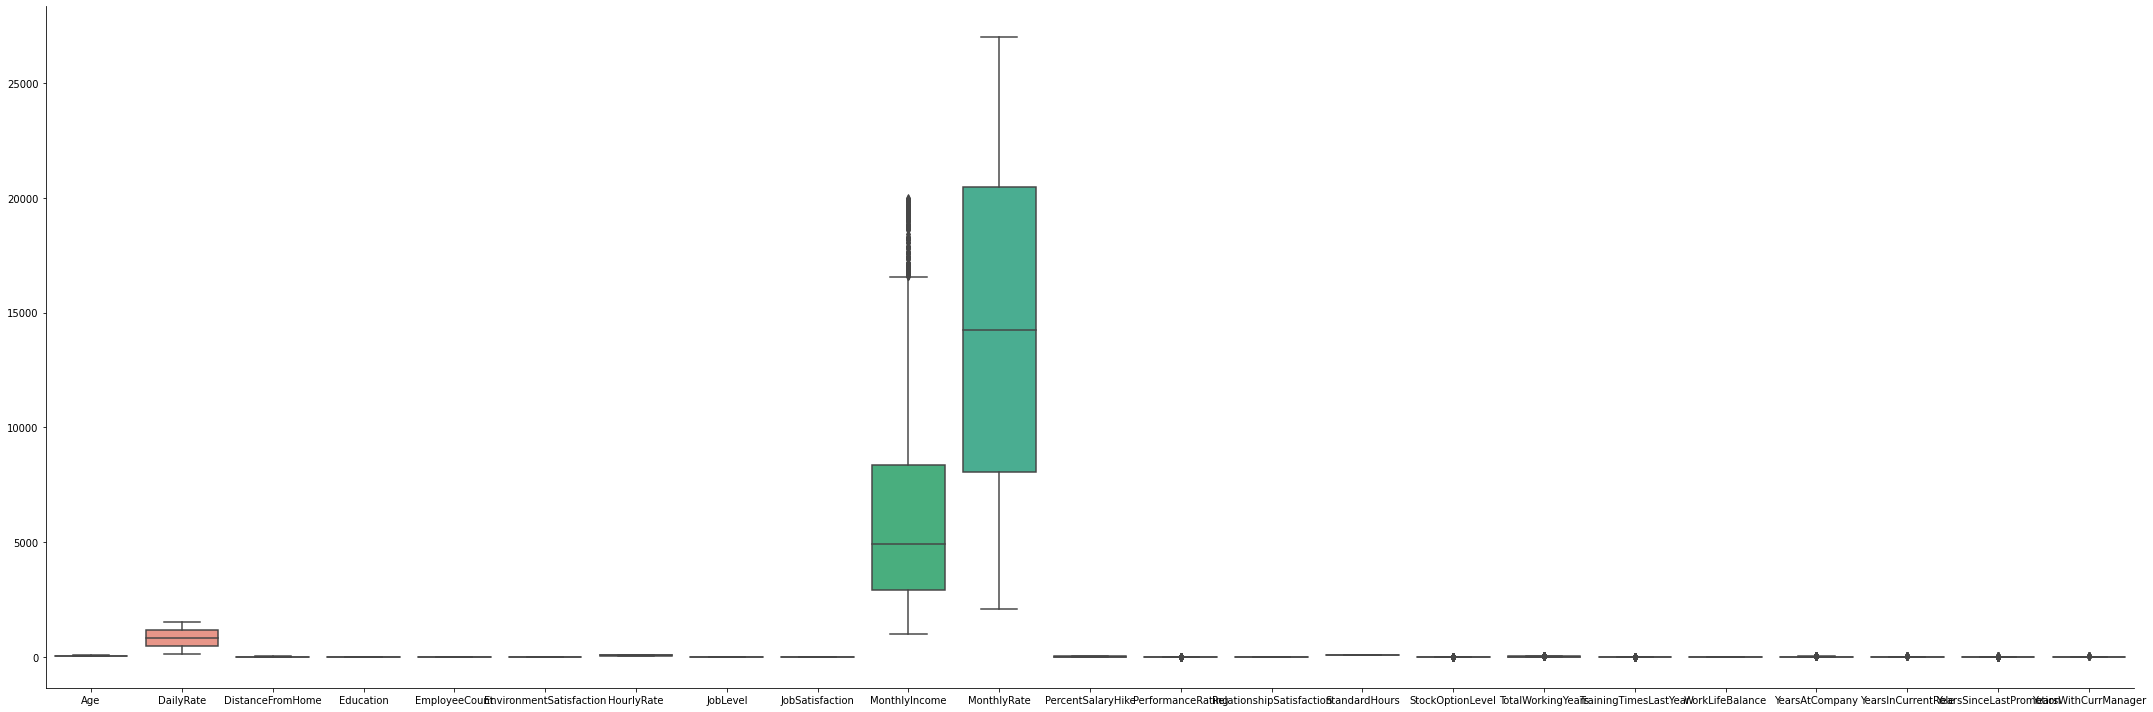

In [106]:
sns.factorplot(data=attrition,kind='box',size=10,aspect=3)

nous pouvons voir que les variables ont des échelles assez différentes et donc tracer une boîte à moustaches n’est pas une bonne idée.
Nous pouvons tracer un kdeplot montrant la distribution de la variable. Ci-dessous, nous avons un kdeplot pour la variable 'Age'.

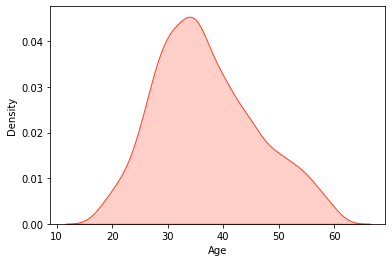

In [107]:
sns.kdeplot(attrition['Age'],shade=True,color='#ff4125')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


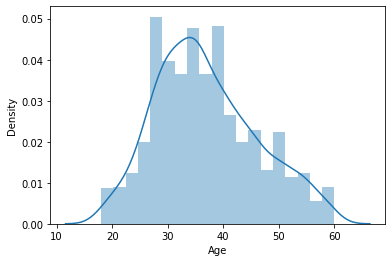

In [108]:
sns.distplot(attrition['Age'])

* L'âge de l'employé est normalement réparti, la majorité se situe entre 20 et 50 ans, la moyenne est d'environ 35 ans.

nous pouvons faire la meme chose pour toutes les variables numériques :

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

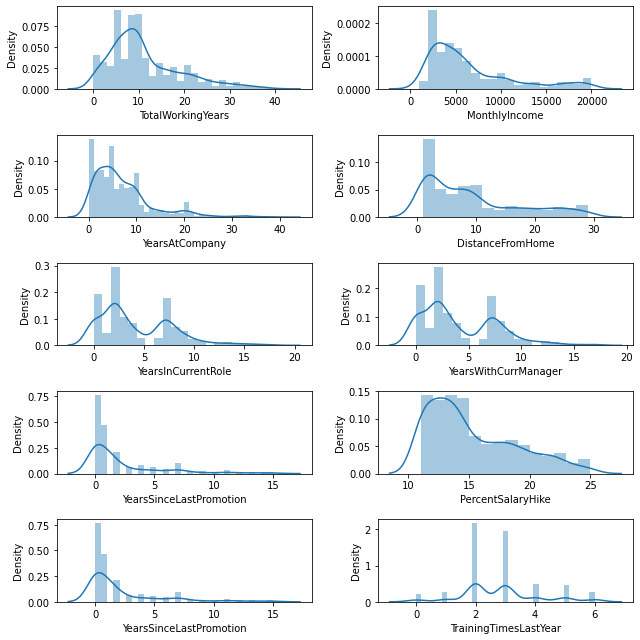

In [109]:
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(attrition['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(attrition['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(attrition['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(attrition['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(attrition['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(attrition['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(attrition['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(attrition['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(attrition['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(attrition['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

* La majorité des gens gagne moins de 10000 par mois, la distribution est décalée à gauche
* L’expérience professionnelle de la population est très dense jusqu’à 15 ans puis diminue rapidement; la distribution est déviée à gauche.

#### variables qualitatives
Analysons maintenant les différentes variables caractéristiques. nous allons utiliser un diagramme de comptage pour montrer le nombre relatif d'observations de différentes catégories.

In [110]:
# definir les variables qualitative
variable_quanti=attrition.select_dtypes(include='object')

In [111]:
#savoir le nom des differentes variables qualitative
variable_quanti.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'Over18', 'OverTime'],
      dtype='object')

In [112]:
###########################################################
# pour faciliter la visualisation,                        #
#nous allons mettre en oeuvre cette fonction qui accepte  #
#le nom d'une chaîne (nom de la colonne) :                #
###########################################################
def plot_cat(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=attrition,kind='count',size=5,aspect=3,x=attr)
        return
    
    sns.factorplot(data=attrition,kind='count',size=5,aspect=1.5,x=attr)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


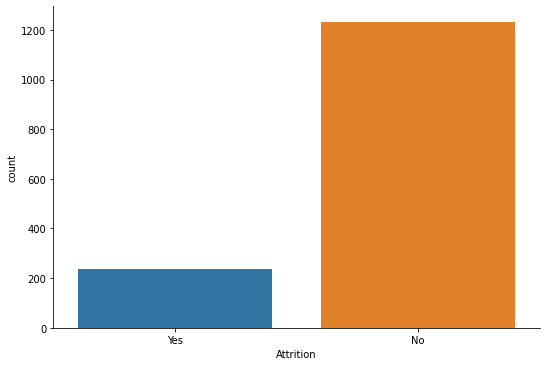

In [113]:
plot_cat('Attrition')

In [114]:
attrition['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

nous pouvons deja voir  que le nombre d'observations appartenant à la catégorie «Non» (1233) est bien supérieur à celui appartenant à la catégorie «Oui» (237), notre base contient plus d'employée dui n'ont pas quitter leur entreprise.
Analysons de la même manière les autres variables.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

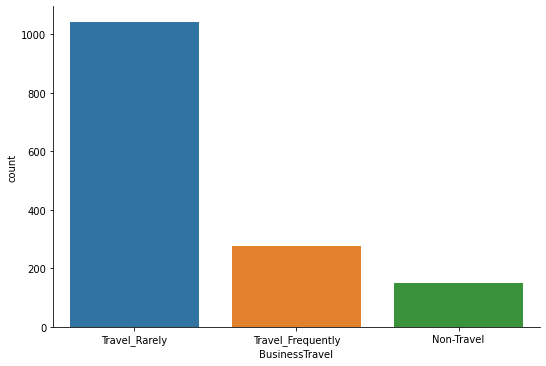

In [115]:
plot_cat('BusinessTravel')
attrition['BusinessTravel'].value_counts()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

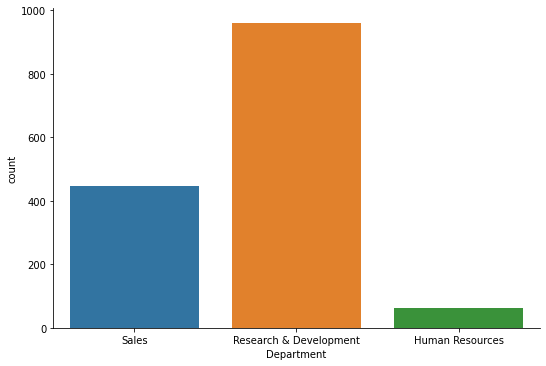

In [116]:
plot_cat('Department')
attrition['Department'].value_counts()

nous nous interessent maintenant a la distribution de JOBROLE et Gender , pour ce dernier nous allons realisé un diagramme à secteur 

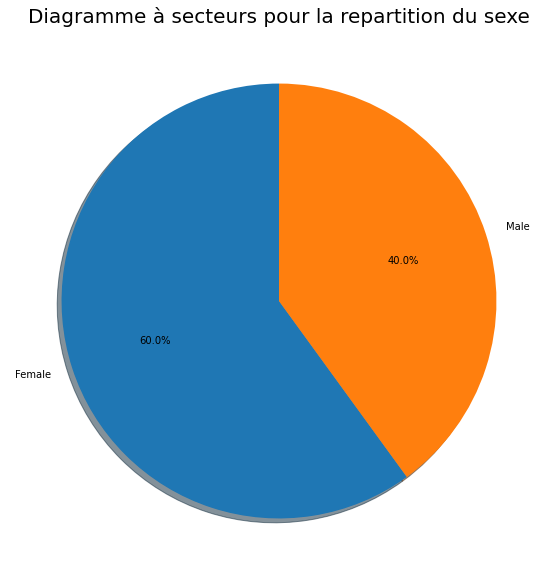

In [117]:
# Distribution du sexe
fig,ax = plt.subplots(1,1, figsize=(10,10))

# Les tranches seront ordonnées et tracées dans le sens anti-horaire.
labels = attrition['Gender'].unique()
jr_array = []

for i in range(len(labels)):
    jr_array.append(attrition['Gender'].value_counts()[i])

plt.pie(jr_array, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
                #  La valeur par défaut est 0
                # tout est tourné de 90 degrés dans le sens inverse des aiguilles d'une montre,
            

plt.title('Diagramme à secteurs pour la repartition du sexe', fontsize=20)
plt.show()

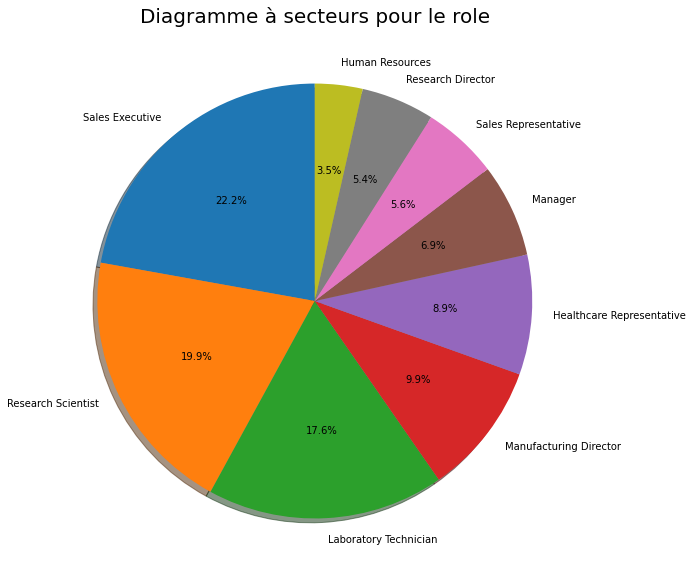

In [118]:
# Distribution du jobrole 
fig,ax = plt.subplots(1,1, figsize=(10,10))

# Les tranches seront ordonnées et tracées dans le sens anti-horaire.
labels = attrition['JobRole'].unique()
jr_array = []

for i in range(len(labels)):
    jr_array.append(attrition['JobRole'].value_counts()[i])

plt.pie(jr_array, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
                #  La valeur par défaut est 0
                # tout est tourné de 90 degrés dans le sens inverse des aiguilles d'une montre,
            

plt.title('Diagramme à secteurs pour le role', fontsize=20)
plt.show()

* la base contient plus de femme que des hommes
* Les emplois occupés par les employés sont au maximum dans les postes de responsable des ventes, puis de recherche et développement, puis de technicien de laboratoire

### 2) statistique Bivarié

In [119]:
################################################# ##########################################
# Définir un module commun pour dessiner des sous-parcelles
# Ce module va dessiner une sous-parcelle en fonction des paramètres
# Il y aura plusieurs sous-parcelles dans la fenêtre de traçage principale
# Définition des paramètres are-
# nom_var - il s'agit du nom de la variable du fichier de données
# tittle_Name - c'est le nom de Tittle donné pour l'intrigue
# nrow & ncol - il s'agit du nombre de sous-parcelles dans la fenêtre de traçage principale
# idx - position de la sous-parcelle dans la fenêtre de traçage principale
# fz - la taille de la police de Tittle dans la fenêtre de traçage principale
################################################# #########################################
def draw_subplots(var_Name,tittle_Name,nrow=1,ncol=1,idx=1,fz=10):
    ax = plt.subplot(nrow,ncol,idx)
    ax.set_title('Distribution of '+var_Name)
    plt.suptitle(tittle_Name, fontsize=fz)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

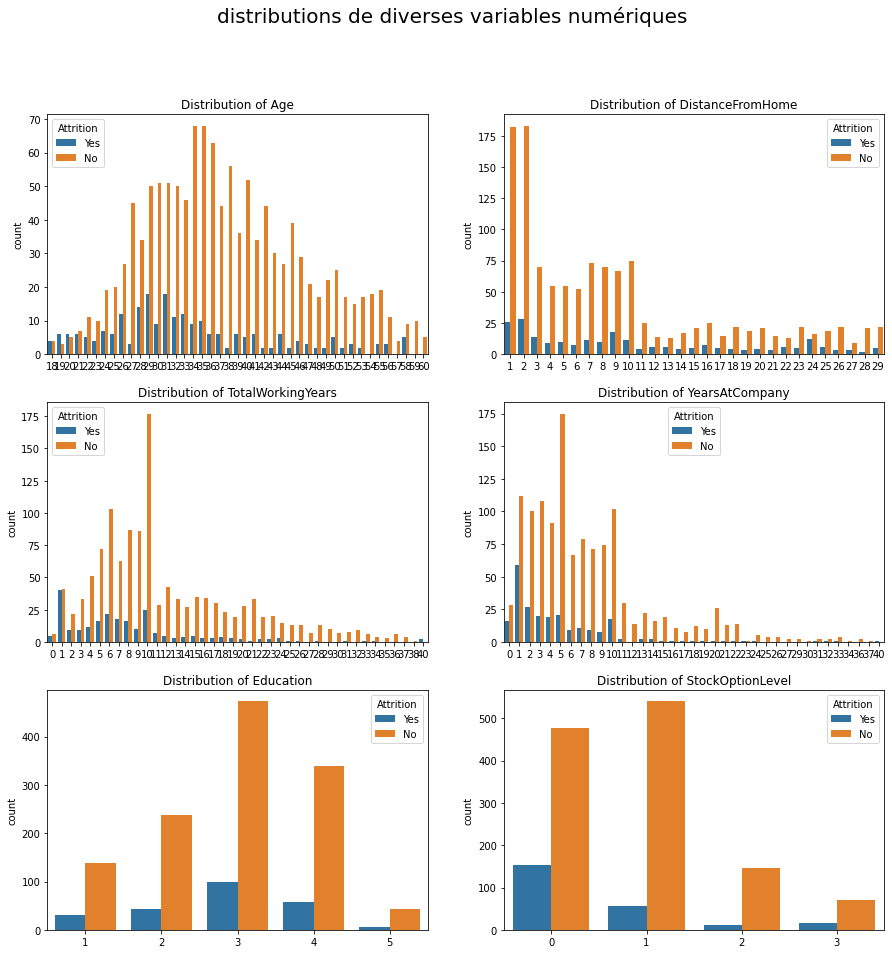

In [120]:
numerique_colonne = ['Age', 'DistanceFromHome', 'TotalWorkingYears',
                   'YearsAtCompany', 'Education','StockOptionLevel']


fig,ax = plt.subplots(1,1, figsize=(15,15))

j=0 # reset the counter to plot 
title_Str="distributions de diverses variables numériques"

for i in numerique_colonne:
    j +=1
    draw_subplots(i,title_Str,3,2,j,20) # create a 3x2 subplots for plotting distribution plots
    sns.countplot(attrition[i],hue=attrition["Attrition"])
    plt.xlabel('')

* L'attrition est élevée à l'âge de 28,29 & 30 ans
* Les personnes ayant un an d'expérience ont abandonné le plus
* Il y a plus d'employés ayant un baccalauréat suivi d'un master qui quittent leur travail
* les employés qui sont proche de leur maison ont le pourcentage d'attrition  faible en comparaison avec les autres

##### nous pouvons aussi faire des boites à moustaches pour mieux comprendre, nous commencons aussi par definir 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

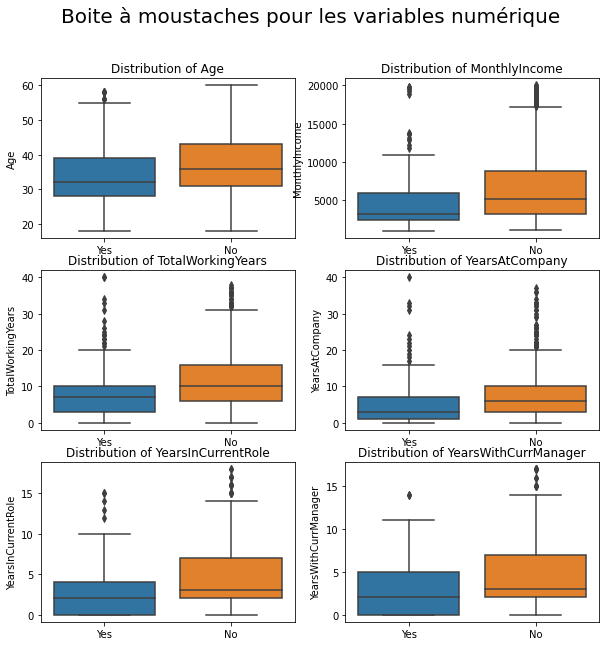

In [121]:
colonne_numerique = ['Age', 'MonthlyIncome', 'TotalWorkingYears',
                   'YearsAtCompany', 'YearsInCurrentRole','YearsWithCurrManager']

fig,ax = plt.subplots(1,1, figsize=(10,10))
j=0 
title_Str="Boite à moustaches pour les variables numérique"

for i in colonne_numerique:
    j +=1
    draw_subplots(i,title_Str,3,2,j,20) 
    sns.boxplot(attrition.Attrition, attrition[i])  
    plt.xlabel('')

* Cette distribution montre que l'attrition est plus élevée chez les employés qui ont entre les 30 à 40 ans
* L’attrition est plus élevée pour les amployés ayant le faibles revenus mensuels
*  les employés qui quittent le plus sont ceux qui ont Moins d'expérience de travail 

#### croisement de plusieurs variables 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


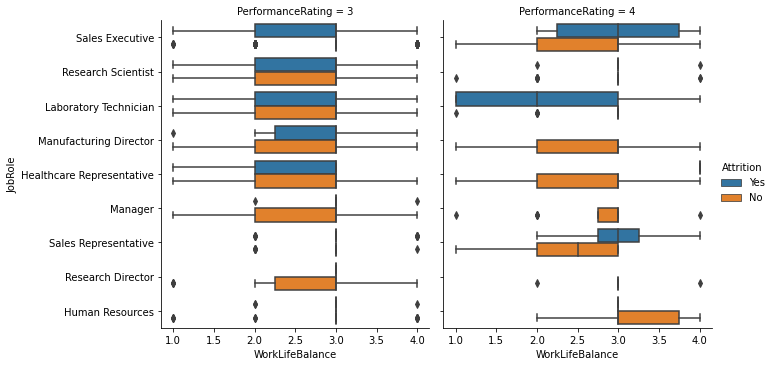

In [122]:
#coisement de plusieurs variables
sns.factorplot(x =   'WorkLifeBalance',
               y =   'JobRole',
               hue = 'Attrition',
               col=  'PerformanceRating',   
               col_wrap=2,           
               kind = 'box',
               data = attrition)

* Les directeurs des ventes(Sales Executives) , même avec une excellente performance, ont tendance à quitter leur travail
* les Techniciens de laboratoire avec des performances exceptionnelles et avec un faible équilibre travail-vie sont ceux qui démissionnent le plus.

###### nous allons maintenant groupez les données par Attrition pour voir comment les valeurs moyennes diffèrent pour différents variables

In [123]:
attrition.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,2.771290,65.952149,2.145985,2.778589,6832.739659,14265.779400,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,2.464135,65.573840,1.637131,2.468354,4787.092827,14559.308017,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


* Le niveau de satisfaction moyen des employés qui restent dans l'entreprise est supérieur à celui des employés qui partent.
* Les personnes ayant le même rôle pendant plus longtemps sont restées plus longtemps dans l'entreprise
* La distance de la maison a également contribué à l'attrition, la moyenne étant plus élevée pour les personnes ayant quitté

### Etude des correlation 

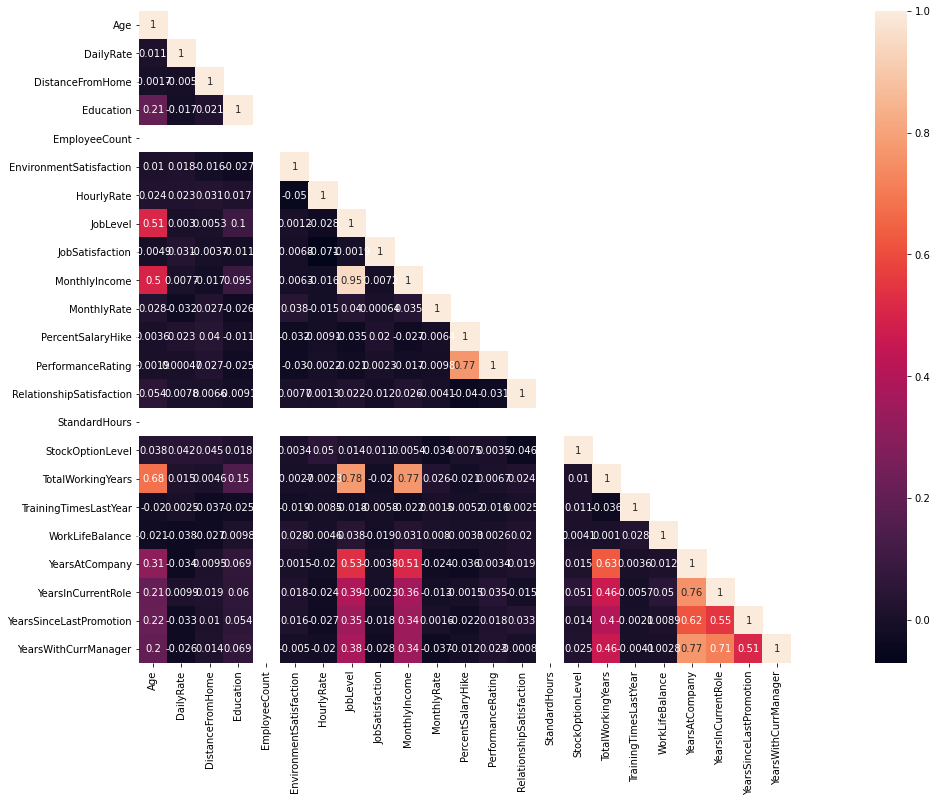

In [124]:
#matrice de correlation
cor_mat= attrition.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

Le niveau d'emploi est étroitement lié à l'âge ,MonthlyIncome (revenu mensuel) est très fortement lié à joblevel (poste),La performance est étroitement liée à la hausse du salaire en pourcentage ,le nombre total d’années de travail est étroitement lié au niveau d’emploi , Années en entreprise est liée aux années dans le rôle actuel (logique).

### Conclusion
##### plusieurs variables influence et poussent les employés à quitter leur travail, les variables qui influence le plus sont
1. Revenu mensuel 
2. Évaluation de la performance 
3. Nombre total d’années de travail
4. ans À la société 
5. Years dans les fonctions actuelles
6. Années dans la dernière promotion 
7. nombre d'annés avec le manager actuel

#   Régression logistique

In [125]:
X, y = attrition.loc[:, attrition.columns !="Attrition"], attrition.loc[:, "Attrition"]

In [126]:
X = pd.get_dummies(X, drop_first= True)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,41,1102,1,2,1,2,94,2,4,5993,19479,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,49,279,8,1,1,3,61,2,2,5130,24907,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,37,1373,2,2,1,4,92,1,3,2090,2396,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1
3,33,1392,3,4,1,4,56,1,3,2909,23159,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,27,591,2,1,1,1,40,1,2,3468,16632,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0


In [127]:
y = pd.get_dummies(y, drop_first= True)
y.head()

,Yes
0,1
1,0
2,1
3,0
4,0


In [128]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=40).fit_transform(X,y)

In [129]:
SelectKBest(chi2, k=40).fit(X,y).get_support(indices=True)

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41])

In [130]:
y = np.ravel(y)

In [131]:
# split le dataset en echantillon d'apprentissage et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

In [132]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [133]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
y_pred = classifier.predict(X_test)

In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[305,   6],
       [ 40,  17]])

In [136]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8711629811629811

AUC - Test Set: 79.68%


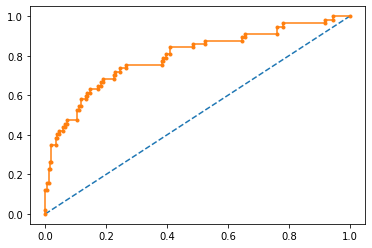

In [137]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score,confusion_matrix,classification_report

#ROC AUC
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]

auc_log = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc_log*100))

# calculons roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#  Arbre de décision

In [138]:
IBMData=attrition.drop(['EmployeeCount','Over18','StandardHours','DailyRate'],axis=1)
IBMData=IBMData.replace({'Attrition':{'No':0,'Yes':1}})
IBMData=IBMData.replace({'Gender':{'Male':0,'Female':1}})
IBMData=IBMData.replace({'BusinessTravel':{'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2}})
IBMData=IBMData.replace({'Department':{'Human Resources':0,'Research & Development':1,'Sales':2}})
IBMData=IBMData.replace({'EducationField':{'Human Resources':0,'Life Sciences':1,'Marketing':2,'Medical':3,'Technical Degree':4,'Other':5}})
IBMData=IBMData.replace({'JobRole':{'Human Resources':0,'Healthcare Representative':1,'Laboratory Technician':2,'Manager':3,'Manufacturing Director':4,'Research Director':5,'Research Scientist':6,'Sales Executive':7,'Sales Representative':8}})
IBMData=IBMData.replace({'MaritalStatus':{'Single':0,'Married':1,'Divorced':2}}) 
IBMData=IBMData.replace({'OverTime':{'No':0,'Yes':1}})
IBMData['MonthlyIncome']=IBMData['MonthlyIncome']-min(IBMData['MonthlyIncome'])/(max(IBMData['MonthlyIncome'])-min(IBMData['MonthlyIncome']))
IBMData['MonthlyRate']=IBMData['MonthlyRate']-min(IBMData['MonthlyRate'])/(max(IBMData['MonthlyRate'])-min(IBMData['MonthlyRate']))
IBMData.shape

(1470, 27)

In [139]:
df_y=IBMData.loc[:,"Attrition"]
df_x=IBMData.drop(["Attrition"],axis=1)
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=.25)

In [140]:
model=DecisionTreeClassifier()
fittedModel=model.fit(x_train, y_train)

In [154]:
predictions=fittedModel.predict(x_test)
confusion=confusion_matrix(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)
print('Accuracy:',accuracy)
accuracy
print(confusion)

Accuracy: 0.7255434782608695
[[257  57]
 [ 44  10]]


AUC - Test Set: 56.32%


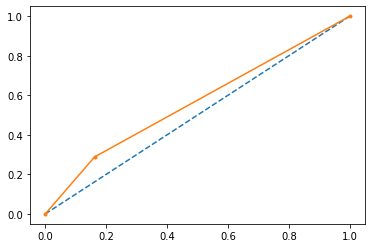

In [142]:
#ROC AUC
probs = fittedModel.predict_proba(x_test)
probs = probs[:, 1]

auc_log = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc_log*100))

# calculons roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [144]:
#importer la base
attrition = pd.read_csv('/content/attrition.csv')
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


#  réseau de neurones

In [145]:
from  sklearn.preprocessing import LabelEncoder, StandardScaler
lb = LabelEncoder() 
attrition['Attrition'] = lb.fit_transform(attrition['Attrition'])
attrition['BusinessTravel'] = lb.fit_transform(attrition['BusinessTravel'])
attrition['Department'] = lb.fit_transform(attrition['Department'])
attrition['EducationField'] = lb.fit_transform(attrition['EducationField'])
attrition['Gender'] = lb.fit_transform(attrition['Gender'])
attrition['JobRole'] = lb.fit_transform(attrition['JobRole'])
attrition['MaritalStatus'] = lb.fit_transform(attrition['MaritalStatus'])
attrition['Over18'] = lb.fit_transform(attrition['Over18'])
attrition['OverTime'] = lb.fit_transform(attrition['OverTime'])

In [146]:
X = attrition.drop(["Attrition"], axis = 1)
y = attrition["Attrition"]

In [147]:
#function for normalizing our data

def normalisation(train_df, test_df):
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    train_df = sc_X.fit_transform(train_df)
    test_df =  sc_X.transform(test_df)
    return train_df, test_df

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train, X_test = normalisation(X_train, X_test)

In [149]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(14,14,14), activation='relu', solver='adam', max_iter=100)
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)
y_proba_mlp = mlp.predict_proba(X_test)[:,1]

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


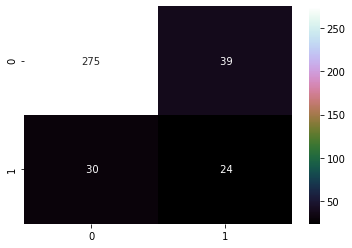

In [150]:
from sklearn.metrics import confusion_matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
import seaborn as sns
sns.heatmap(cm_mlp, annot=True,fmt='3.0f',cmap="cubehelix")

In [151]:
accurancy_neural = round(mlp.score(X_test, y_test) * 100, 2)
print(str(accurancy_neural) + ' %')

81.25 %


AUC - Test Set: 74.50%


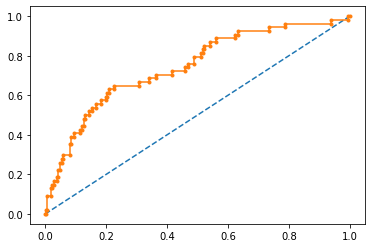

In [153]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score,confusion_matrix,classification_report

probs = mlp.predict_proba(X_test)
probs = probs[:, 1]
auc_mlp = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc_mlp*100))


fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**### Conclusion **
# Le meilleur model en terme de précision (Accuracy) est la regréssion logistique avec 87% suivie par les réseaux de neurones et en dérnier lieu l'arbre de décision.   